In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


In [2]:
train_data = pd.read_csv('../input/tabular-playground-series-may-2021/train.csv')
train_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [3]:
train_data.drop("id",axis=1,inplace=True)
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


<AxesSubplot:xlabel='target', ylabel='count'>

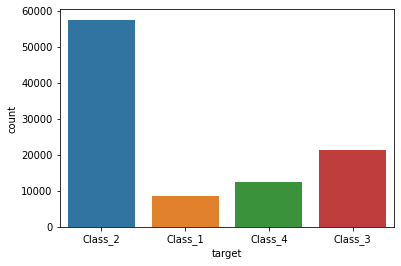

In [4]:
sns.countplot(train_data['target'])

In [5]:
train_data['target']=train_data['target'].replace({'Class_1':0, 'Class_2':1, 'Class_3':2, 'Class_4':3})
train_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,1
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
X=train_data.drop('target',axis=1).values
y=train_data['target'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=100 , stratify = y )

## CatBoostClassifier

In [8]:
from catboost import CatBoostClassifier

In [9]:
model_catboost=CatBoostClassifier(loss_function='MultiClassOneVsAll',random_seed = 0)
model_catboost.fit(X_train,y_train, verbose = 1000)

0:	learn: 0.6813507	total: 99.6ms	remaining: 1m 39s
999:	learn: 0.4465077	total: 42.6s	remaining: 0us


In [10]:
pred_catboost=model_catboost.predict(X_test)
catboost_score =model_catboost.score(X_train,y_train)
catboost_pred_score =round(catboost_score*100,2)
catboost_pred_score

58.36

In [11]:
print(classification_report(y_test,pred_catboost))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2547
           1       0.58      0.99      0.73     17249
           2       0.49      0.04      0.07      6426
           3       0.00      0.00      0.00      3778

    accuracy                           0.58     30000
   macro avg       0.27      0.26      0.20     30000
weighted avg       0.44      0.58      0.44     30000



In [12]:
test_data=pd.read_csv('../input/tabular-playground-series-may-2021/test.csv')
test_data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [13]:
test_id =test_data['id'].values 
test_prediction=test_data.drop('id',axis=1).values
prediction = model_catboost.predict_proba(test_prediction)
prediction

array([[0.09623361, 0.60274401, 0.16027138, 0.1359365 ],
       [0.09772961, 0.67318562, 0.14616798, 0.08380749],
       [0.08612097, 0.6240377 , 0.18254376, 0.10137495],
       ...,
       [0.07576111, 0.51813688, 0.2300173 , 0.17681129],
       [0.07459633, 0.57254773, 0.18097224, 0.17457493],
       [0.07984871, 0.58084089, 0.17941458, 0.15774159]])

In [14]:
sample_data = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv')
sample_data.head()

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25


In [15]:
sample_data.iloc[:,1:5] = prediction
sample_data

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.096234,0.602744,0.160271,0.135937
1,100001,0.097730,0.673186,0.146168,0.083807
2,100002,0.086121,0.624038,0.182544,0.101375
3,100003,0.085348,0.547542,0.256930,0.106432
4,100004,0.073520,0.598064,0.194621,0.126320
...,...,...,...,...,...
49995,149995,0.100060,0.713483,0.130738,0.062978
49996,149996,0.078212,0.652097,0.134033,0.141362
49997,149997,0.075761,0.518137,0.230017,0.176811
49998,149998,0.074596,0.572548,0.180972,0.174575


In [16]:
sample_data.to_csv('submission.csv',index=False)